In [11]:
# Data Viz/EDA

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
import tf_data_utils
import keras_cv

In [2]:
dataset_dir = '/Users/NickPC/Documents/DataScience/Datasets/miccai2022_sisvse_dataset/'
real_images_dir = dataset_dir + "images/real/"
real_masks_train_dir = dataset_dir + 'semantic_masks/real_train_1/'

In [3]:
image_index = 32

In [4]:
first_image = sorted(os.listdir(real_images_dir))[image_index]
first_img = Image.open(real_images_dir + first_image)
print(first_image)

R001_ch1_video_01_00-57-14-23.jpg


In [5]:
first_mask = sorted(os.listdir(real_masks_train_dir))[image_index]
first_msk = Image.open(real_masks_train_dir + first_mask)
print(first_mask)

R001_ch1_video_01_00-57-14-23.png


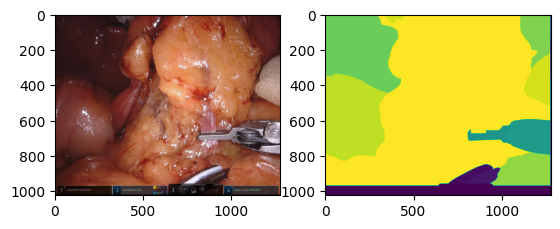

In [6]:
f, axs = plt.subplots(1,2)
axs[0].imshow(first_img)
axs[1].imshow(first_msk)
plt.show()


In [7]:
np.unique(np.asarray(first_msk), return_counts=True)

(array([ 0,  1,  2, 16, 17, 24, 25, 26, 28, 29, 31], dtype=uint8),
 array([ 82403,   9904,   9455,  13108,  41273, 142051,  35002,  49977,
        138725,  33536, 755286]))

In [22]:
images_dir = '/Users/NickPC/Documents/DataScience/Datasets/miccai2022_sisvse_dataset/images/real/'
train_masks_dir = '/Users/NickPC/Documents/DataScience/Datasets/miccai2022_sisvse_dataset/semantic_masks/real_train_1/'

train_dataset = tf_data_utils.SegmentationDataset(images_dir=images_dir, masks_dir=train_masks_dir, augment=True, batch_size=4, shuffle=False).get_dataset()

# for element in train_dataset.take(1):
#     print(np.unique(np.asarray(element[0]), return_counts=True))


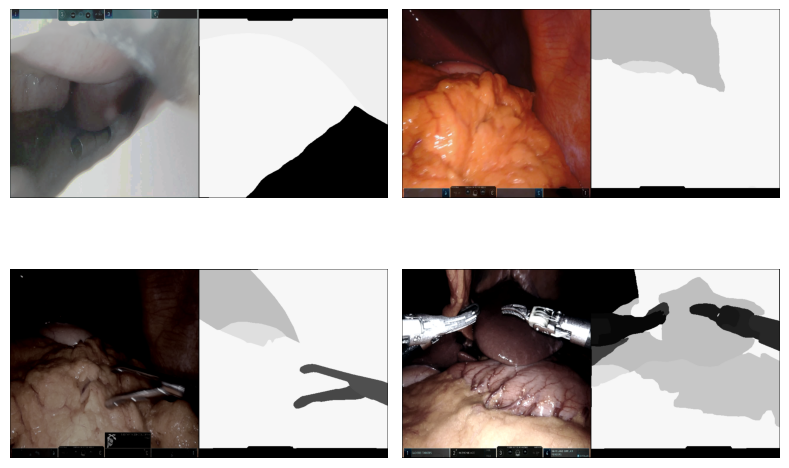

In [23]:

# plot_train_ds = train_dataset.ragged_batch(4)
# viz_images, viz_masks = next(iter(plot_train_ds.take(1)))

viz_images, viz_masks = next(iter(train_dataset.take(1)))


keras_cv.visualization.plot_segmentation_mask_gallery(
    viz_images,
    value_range=(0, 1),
    num_classes=32,
    y_true=viz_masks,
    y_pred=None,
    scale=4,
    rows=2,
    cols=2,
)